In [ ]:
import tensorflow  as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
a=np.array([[[[
    [1, 2, 3,3,4,2],
    [4, 5, 6,2,4,5],
    [7, 8, 9,0,3,4],
    [1,2,3,4,5,6],
    [1,2,3,5,3,5],
    [3,4,5,6,7,8]
    ]]]])

In [ ]:
tf.constant(a)

<tf.Tensor: shape=(1, 1, 1, 6, 6), dtype=int64, numpy=
array([[[[[1, 2, 3, 3, 4, 2],
          [4, 5, 6, 2, 4, 5],
          [7, 8, 9, 0, 3, 4],
          [1, 2, 3, 4, 5, 6],
          [1, 2, 3, 5, 3, 5],
          [3, 4, 5, 6, 7, 8]]]]])>

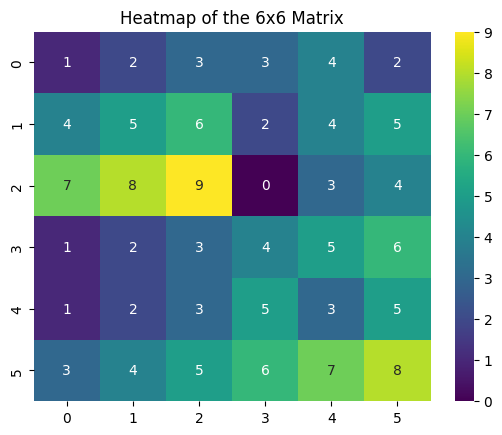

In [ ]:
matrix_data = a[0, 0, 0, :, :]
sns.heatmap(matrix_data, annot=True, cmap="viridis")
plt.title("Heatmap of the 6x6 Matrix")
plt.show()

In [ ]:
weights = tf.Variable([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)
print(weights)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>


In [ ]:
random_weights = tf.Variable(tf.random.normal(shape=(3, 3)))
print(random_weights)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[-0.20407337, -0.7181378 , -0.4181006 ],
       [ 0.04977885, -0.84766537, -1.1241146 ],
       [ 0.8124238 ,  0.93001074,  1.6512884 ]], dtype=float32)>


In [ ]:
uniform_weights = tf.Variable(tf.random.uniform(shape=(4, 4), minval=0, maxval=1))
print(uniform_weights)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32, numpy=
array([[0.72425306, 0.41948712, 0.73062396, 0.12926066],
       [0.09950376, 0.86064744, 0.1256032 , 0.56658995],
       [0.9662914 , 0.21922529, 0.5806997 , 0.2232809 ],
       [0.08477473, 0.08420026, 0.48106766, 0.16026342]], dtype=float32)>


In [ ]:
zeros = tf.Variable(tf.zeros(shape=(2, 2)))
print(zeros)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>


In [ ]:
ones = tf.Variable(tf.ones(shape=(3, 1)))
print(ones)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
identity_matrix = tf.Variable(tf.eye(3))  # 3x3 identity
print(identity_matrix)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>


In [ ]:
non_trainable_var = tf.Variable([1, 2, 3], trainable=False)
print(non_trainable_var)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [ ]:
input_data = [[1.0, 2.0], [3.0, 4.0]]
output = tf.multiply(input_data, 2)  # Example operation
print(output)

tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([[1.0, 2.0], [3.0, 4.0]])
for batch in dataset:
    print(batch * 2)


tf.Tensor([2. 4.], shape=(2,), dtype=float32)
tf.Tensor([6. 8.], shape=(2,), dtype=float32)


In [ ]:
indices2 = [[0, 0], [1, 2], [2, 3]]
values2 = [2.0, 4.0, 8.0]
sparse_tensor2 = tf.sparse.SparseTensor(indices2, values2, [4, 5])

# Create a dense tensor 'b' for multiplication
# b's number of rows must match sparse_tensor2's number of columns
# So b should have 5 rows
b = tf.constant([[1, 2, 3, 4],
                 [6, 7, 8, 9],
                 [11, 12, 13, 14],
                 [16, 17, 18, 19],
                 [20, 21, 22, 23]], dtype=tf.float32)

# Now pass both sparse_tensor2 and b to the function
result = tf.sparse.sparse_dense_matmul(sparse_tensor2, b)

print(result)

tf.Tensor(
[[  2.   4.   6.   8.]
 [ 44.  48.  52.  56.]
 [128. 136. 144. 152.]
 [  0.   0.   0.   0.]], shape=(4, 4), dtype=float32)


**crate ones vs ones_like vs ones_initializer**

In [ ]:
# Example input tensor
input_tensor = tf.constant([[1, 2], [3, 4]], dtype=tf.int32)

# Creates ones with the same shape/dtype as input_tensor
ones_tensor = tf.ones_like(input_tensor)
print(ones_tensor)

tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [ ]:
# Using with tf.Variable
initializer = tf.ones_initializer()
weights = tf.Variable(initializer(shape=[3, 3]), dtype=tf.float32)

# Using in a Keras layer
layer = tf.keras.layers.Dense(
    units=4,
    kernel_initializer=tf.ones_initializer()
)
print(weights)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [ ]:
tf.equal([1, 2], [1, 3])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [ ]:
tf.greater([5, 3], [4, 3])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [ ]:
tf.logical_and([True, False], [True, True])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [ ]:
w = tf.Variable(5.0)

In [ ]:
lr = 0.1


In [ ]:
for i in range(10):
      with tf.GradientTape() as tape:
         loss = (w - 3)**2
      grad = tape.gradient(loss, w)
      w.assign_sub(lr * grad)
      print(f"Step {i+1}, w: {w.numpy():.4f}, loss: {loss.numpy():.4f}")

Step 1, w: 4.6000, loss: 4.0000
Step 2, w: 4.2800, loss: 2.5600
Step 3, w: 4.0240, loss: 1.6384
Step 4, w: 3.8192, loss: 1.0486
Step 5, w: 3.6554, loss: 0.6711
Step 6, w: 3.5243, loss: 0.4295
Step 7, w: 3.4194, loss: 0.2749
Step 8, w: 3.3355, loss: 0.1759
Step 9, w: 3.2684, loss: 0.1126
Step 10, w: 3.2147, loss: 0.0721


Step 1, w: 4.6000, loss: 4.0000
Step 2, w: 4.2800, loss: 2.5600
Step 3, w: 4.0240, loss: 1.6384
Step 4, w: 3.8192, loss: 1.0486
Step 5, w: 3.6554, loss: 0.6711
Step 6, w: 3.5243, loss: 0.4295
Step 7, w: 3.4194, loss: 0.2749
Step 8, w: 3.3355, loss: 0.1759
Step 9, w: 3.2684, loss: 0.1126
Step 10, w: 3.2147, loss: 0.0721


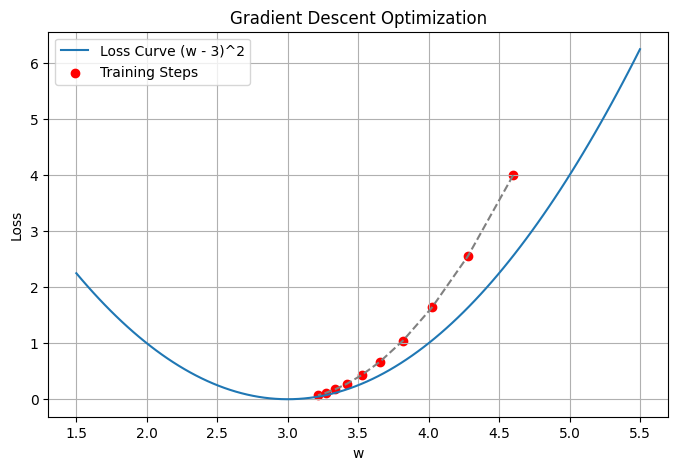

In [ ]:
# Step 1: Define loss function
def loss_fn(w):
    return (w - 3)**2

# Step 2: Initialize w and training history
w = tf.Variable(5.0)
lr = 0.1
w_history = []
loss_history = []

# Step 3: Training loop
for i in range(10):
    with tf.GradientTape() as tape:
        loss = loss_fn(w)
    grad = tape.gradient(loss, w)
    w.assign_sub(lr * grad)

    w_history.append(w.numpy())
    loss_history.append(loss.numpy())
    print(f"Step {i+1}, w: {w.numpy():.4f}, loss: {loss.numpy():.4f}")

# Step 4: Plot loss curve and training steps
import numpy as np

w_vals = np.linspace(1.5, 5.5, 100)
loss_vals = (w_vals - 3)**2

plt.figure(figsize=(8, 5))
plt.plot(w_vals, loss_vals, label="Loss Curve (w - 3)^2")
plt.scatter(w_history, loss_history, color='red', label="Training Steps")
plt.plot(w_history, loss_history, '--', color='gray')
plt.xlabel("w")
plt.ylabel("Loss")
plt.title("Gradient Descent Optimization")
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4860 - loss: 0.6808 - val_accuracy: 0.5650 - val_loss: 0.6609
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5527 - loss: 0.6584 - val_accuracy: 0.5850 - val_loss: 0.6432
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5771 - loss: 0.6414 - val_accuracy: 0.6300 - val_loss: 0.6249
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5997 - loss: 0.6260 - val_accuracy: 0.6750 - val_loss: 0.6011
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6417 - loss: 0.6041 - val_accuracy: 0.7250 - val_loss: 0.5768
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7088 - loss: 0.5758 - val_accuracy: 0.7650 - val_loss: 0.5499
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7368 - loss: 0.5543 - val_accuracy: 0.8050 - val_loss: 0.5216
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8211 - loss: 0.5225 - val_accuracy: 0.8550 - val_loss: 0.4924
E

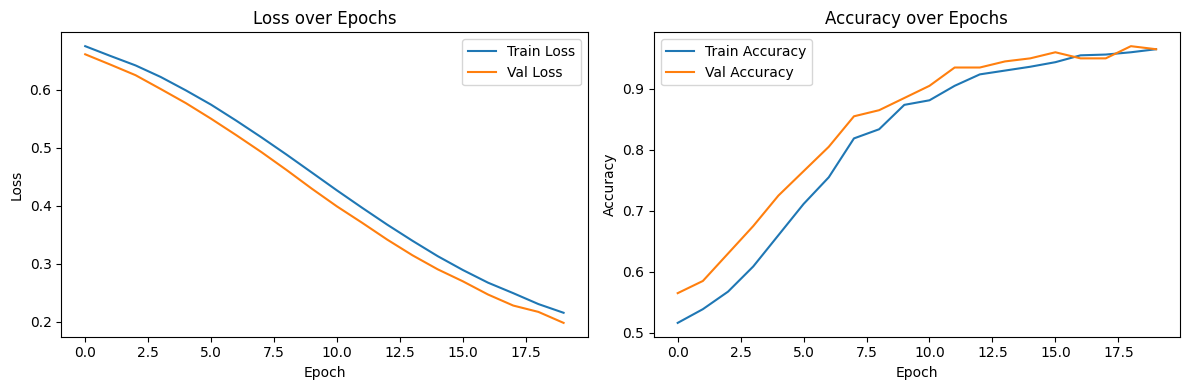

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Step 1: Create fake data (binary classification)
np.random.seed(42)
x_train = np.random.rand(1000, 2)  # 1000 samples, 2 features
y_train = (x_train[:, 0] + x_train[:, 1] > 1).astype(int)  # If sum > 1, label 1 else 0

# Step 2: Build the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),  # input layer
    Dense(8, activation='relu'),                     # hidden layer
    Dense(1, activation='sigmoid')                   # output layer for binary
])

# Step 3: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Step 5: Plot Accuracy & Loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
